**EDA - Facebook Dataset**

Exploratory data analysis using Python, Numpy, Pandas, Seaborn

*Table of Contents*


1.  Problem Statement
2.  Data Loading and Description
3.  Data Profiling
4.  Understanding the Dataset
5.  Profiling_1
6.  Preprocessing_1
7.  Profiling_2
8.  Preprocessing_2
9.  Post Profiling
10. Conclusions


**1. Problem Statment**

To understand Facebook user behavoir on likes, friend requests made, tenure, usage of Facebook on different devices etc.

The notebooks explores the basic use of Pandas and will cover the basic commands of Exploratory Data Analysis(EDA) which includes cleaning, munging, combining, reshaping, slicing, dicing, and transforming data for analysis purpose.

Exploratory Data Analysis
Understand the data by EDA and derive simple models with Pandas as baseline. EDA ia a critical and first step in analyzing the data and we do this for below reasons :

Finding patterns in Data
Determining relationships in Data
Checking of assumptions
Preliminary selection of appropriate models
Detection of mistakes

**2. Data Loading and Description**

```
The dataset consists information collected from Facebook for study/practice purpose.
The dataset comprises of 99003 observations of 15 columns. 
```


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

In [0]:
import numpy as np                     

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

In [0]:
# Install and update plotly using this command to the latest version (higher than version 4.0.0)

!pip install plotly --upgrade

Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.1.1)


In [0]:
# Install chart_studio, please use this command. 

!pip install chart-studio


     |████████████████████████████████| 81kB 3.1MB/s 


In [0]:
# Making plotly specific imports
# These imports are necessary to use plotly offline without signing in to their website.

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly import tools
init_notebook_mode(connected=True)

In [0]:
# Importing the FACEBOOK Dataset
import pandas as pd
df= pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/facebook_data.csv')
df.head()

userid  age  dob_day  dob_year  dob_month  gender  tenure  friend_count  \
0  2094382  14   19       1999      11         male    266.0   0              
1  1192601  14   2        1999      11         female  6.0     0              
2  2083884  14   16       1999      11         male    13.0    0              
3  1203168  14   25       1999      12         female  93.0    0              
4  1733186  14   4        1999      12         male    82.0    0              

   friendships_initiated  likes  likes_received  mobile_likes  \
0  0                      0      0               0              
1  0                      0      0               0              
2  0                      0      0               0              
3  0                      0      0               0              
4  0                      0      0               0              

   mobile_likes_received  www_likes  www_likes_received  
0  0                      0          0                   
1  0                      0          0                   
2  0                      0          0                   
3  0                      0          0                   
4  0                      0          0

In [0]:
df.info()
# We found that the Gendre and tenure columns have NAN values. So lets work on those data to get it alligned with regular data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
userid                   99003 non-null int64
age                      99003 non-null int64
dob_day                  99003 non-null int64
dob_year                 99003 non-null int64
dob_month                99003 non-null int64
gender                   98828 non-null object
tenure                   99001 non-null float64
friend_count             99003 non-null int64
friendships_initiated    99003 non-null int64
likes                    99003 non-null int64
likes_received           99003 non-null int64
mobile_likes             99003 non-null int64
mobile_likes_received    99003 non-null int64
www_likes                99003 non-null int64
www_likes_received       99003 non-null int64
dtypes: float64(1), int64(13), object(1)
memory usage: 11.3+ MB


In [0]:
df.describe()

userid           age       dob_day      dob_year     dob_month  \
count  9.900300e+04  99003.000000  99003.000000  99003.000000  99003.000000   
mean   1.597045e+06  37.280224     14.530408     1975.719776   6.283365       
std    3.440592e+05  22.589748     9.015606      22.589748     3.529672       
min    1.000008e+06  13.000000     1.000000      1900.000000   1.000000       
25%    1.298806e+06  20.000000     7.000000      1963.000000   3.000000       
50%    1.596148e+06  28.000000     14.000000     1985.000000   6.000000       
75%    1.895744e+06  50.000000     22.000000     1993.000000   9.000000       
max    2.193542e+06  113.000000    31.000000     2000.000000   12.000000      

             tenure  friend_count  friendships_initiated         likes  \
count  99001.000000  99003.000000  99003.000000           99003.000000   
mean   537.887375    196.350787    107.452471             156.078785     
std    457.649874    387.304229    188.786951             572.280681     
min    0.000000      0.000000      0.000000               0.000000       
25%    226.000000    31.000000     17.000000              1.000000       
50%    412.000000    82.000000     46.000000              11.000000      
75%    675.000000    206.000000    117.000000             81.000000      
max    3139.000000   4923.000000   4144.000000            25111.000000   

       likes_received  mobile_likes  mobile_likes_received     www_likes  \
count  99003.000000    99003.000000  99003.000000           99003.000000   
mean   142.689363      106.116300    84.120491              49.962425      
std    1387.919613     445.252985    839.889444             285.560152     
min    0.000000        0.000000      0.000000               0.000000       
25%    1.000000        0.000000      0.000000               0.000000       
50%    8.000000        4.000000      4.000000               0.000000       
75%    59.000000       46.000000     33.000000              7.000000       
max    261197.000000   25111.000000  138561.000000          14865.000000   

       www_likes_received  
count  99003.000000        
mean   58.568831           
std    601.416348          
min    0.000000            
25%    0.000000            
50%    2.000000            
75%    20.000000           
max    129953.000000

In [0]:
# To install pandas profiling please run this command.

!pip install pandas-profiling --upgrade

     |████████████████████████████████| 133kB 2.8MB/s 
     |████████████████████████████████| 614kB 8.8MB/s 
     |████████████████████████████████| 225kB 52.5MB/s 
     |████████████████████████████████| 768kB 50.7MB/s 
     |████████████████████████████████| 194kB 54.2MB/s 
     |████████████████████████████████| 51kB 24.8MB/s 
     |████████████████████████████████| 737kB 56.8MB/s 
     |████████████████████████████████| 51kB 20.1MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.3.0-py2.py3-none-any.whl size=145035 sha256=71042d8a396e8426551908cee9cc70e15b74e4e2de36beee6a8697822f313c19
  Stored in directory: /root/.cache/pip/wheels/ce/c7/f1/dbfef4848ebb048cb1d4a22d1ed0c62d8ff2523747235e19fe
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=ca94e1783807ea4b9a24562b447bef4435de8cb7d4cfb2485fb33cf37b673dd8
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created whe

In [0]:
import pandas_profiling 


In [0]:
#Preprofiling of Data.
df.profile_report(title='Pandas Profiling before Data Preprocessing', style={'full_width':True})

In [0]:
df[df['dob_day']==1]['dob_day'].count()/df[df['dob_day']==2]['dob_day'].count()

2.317395130536814

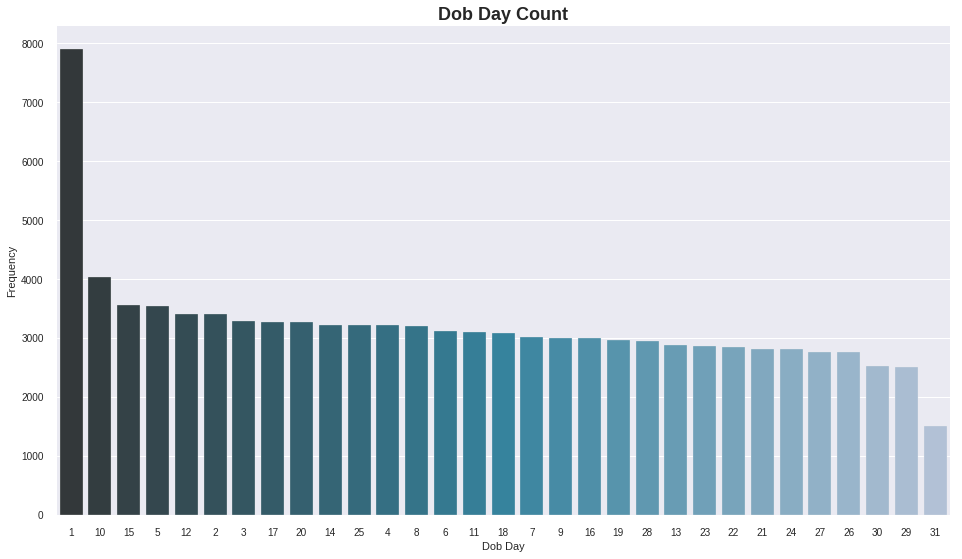

In [0]:
plt.figure(figsize=(16,9))
sns.countplot('dob_day',data = df, order = df['dob_day'].value_counts().index,palette="PuBuGn_d")
plt.title("Dob Day Count",fontsize=18,fontweight="bold")
plt.xlabel('Dob Day')
plt.ylabel('Frequency')
plt.show() # From the below graph we can conclude that users having day of birth on 1st of any month is around 230% more than the day of birth on any other day of the month.
#This is highly unlikely and can be assumed that the few users randomly enter the day of the birth as 1st. It can be considered that they are creating fake accounts.


In [0]:

df[df['gender'].isnull()].count() #175 entries are gender NAN: It can be considered Transgender.
# But it will not add any insight to our analysis. So since the ratio of 175/99903 is very low, we will allocae the NAN values to the mode.
#df['gender'].dropna().mode()

userid                   175
age                      175
dob_day                  175
dob_year                 175
dob_month                175
gender                   0  
tenure                   175
friend_count             175
friendships_initiated    175
likes                    175
likes_received           175
mobile_likes             175
mobile_likes_received    175
www_likes                175
www_likes_received       175
dtype: int64

In [0]:
df['gender']=df['gender'].fillna(df['gender'].dropna().mode()[0]) # Filling the missing gender values with the mode values

df[df['gender'].isnull()].count()

userid                   0
age                      0
dob_day                  0
dob_year                 0
dob_month                0
gender                   0
tenure                   0
friend_count             0
friendships_initiated    0
likes                    0
likes_received           0
mobile_likes             0
mobile_likes_received    0
www_likes                0
www_likes_received       0
dtype: int64

In [0]:
df['tenure']=df['tenure'].fillna(df['tenure'].dropna().median()) # Filling the missing tenure values with the median values

df[df['tenure'].isnull()].count()

userid                   0
age                      0
dob_day                  0
dob_year                 0
dob_month                0
gender                   0
tenure                   0
friend_count             0
friendships_initiated    0
likes                    0
likes_received           0
mobile_likes             0
mobile_likes_received    0
www_likes                0
www_likes_received       0
dtype: int64

In [0]:
df[df['tenure']== df['tenure'].max()]

userid  age  dob_day  dob_year  dob_month gender  tenure  \
86383  1419799  111  1        1902      2          male   3139.0   
96429  1601778  100  16       1913      1          male   3139.0   
97177  2135122  108  17       1905      6          male   3139.0   

       friend_count  friendships_initiated  likes  likes_received  \
86383  372           40                     11     21               
96429  1069          373                    137    63               
97177  1343          167                    18     14               

       mobile_likes  mobile_likes_received  www_likes  www_likes_received  
86383  2             13                     9          8                   
96429  45            35                     92         28                  
97177  0             12                     18         2

In [0]:

ind=df[df.where(df['tenure']>365).where(df['likes']==0).where(df['friendships_initiated']==0)['userid']>0].index  # To find the Rows where tenure>365, likes==0 && friendships_initiated==0
df.drop(ind,0,inplace=True)# delete the indexes
df[df.where(df['tenure']>365).where(df['likes']==0).where(df['friendships_initiated']==0)['userid']>0].count() # Print To Check if the unrequired rows are now deleted

userid                   0
age                      0
dob_day                  0
dob_year                 0
dob_month                0
gender                   0
tenure                   0
friend_count             0
friendships_initiated    0
likes                    0
likes_received           0
mobile_likes             0
mobile_likes_received    0
www_likes                0
www_likes_received       0
dtype: int64

In [0]:
#Post profiling of Data.
df.profile_report(title='Pandas Profiling before Data Preprocessing', style={'full_width':True})

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98201 entries, 0 to 99002
Data columns (total 15 columns):
userid                   98201 non-null int64
age                      98201 non-null int64
dob_day                  98201 non-null int64
dob_year                 98201 non-null int64
dob_month                98201 non-null int64
gender                   98201 non-null object
tenure                   98201 non-null float64
friend_count             98201 non-null int64
friendships_initiated    98201 non-null int64
likes                    98201 non-null int64
likes_received           98201 non-null int64
mobile_likes             98201 non-null int64
mobile_likes_received    98201 non-null int64
www_likes                98201 non-null int64
www_likes_received       98201 non-null int64
dtypes: float64(1), int64(13), object(1)
memory usage: 12.0+ MB


In [0]:
df.describe()

userid           age       dob_day      dob_year     dob_month  \
count  9.820100e+04  98201.000000  98201.000000  98201.000000  98201.000000   
mean   1.597058e+06  37.292349     14.538426     1975.707651   6.286830       
std    3.441102e+05  22.640850     9.013913      22.640850     3.528375       
min    1.000008e+06  13.000000     1.000000      1900.000000   1.000000       
25%    1.298835e+06  20.000000     7.000000      1963.000000   3.000000       
50%    1.596169e+06  28.000000     14.000000     1985.000000   6.000000       
75%    1.895857e+06  50.000000     22.000000     1993.000000   9.000000       
max    2.193542e+06  113.000000    31.000000     2000.000000   12.000000      

             tenure  friend_count  friendships_initiated         likes  \
count  98201.000000  98201.000000  98201.000000           98201.000000   
mean   537.330811    197.937404    108.330027             157.353469     
std    458.890754    388.482294    189.305368             574.438279     
min    0.000000      0.000000      0.000000               0.000000       
25%    225.000000    32.000000     17.000000              1.000000       
50%    410.000000    83.000000     47.000000              11.000000      
75%    675.000000    207.000000    118.000000             83.000000      
max    3139.000000   4923.000000   4144.000000            25111.000000   

       likes_received  mobile_likes  mobile_likes_received     www_likes  \
count  98201.000000    98201.000000  98201.000000           98201.000000   
mean   143.852761      106.982943    84.806641              50.370465      
std    1393.515701     446.963773    843.277698             286.688023     
min    0.000000        0.000000      0.000000               0.000000       
25%    1.000000        0.000000      0.000000               0.000000       
50%    9.000000        4.000000      5.000000               0.000000       
75%    60.000000       47.000000     34.000000              7.000000       
max    261197.000000   25111.000000  138561.000000          14865.000000   

       www_likes_received  
count  98201.000000        
mean   59.046079           
std    603.843944          
min    0.000000            
25%    0.000000            
50%    2.000000            
75%    20.000000           
max    129953.000000

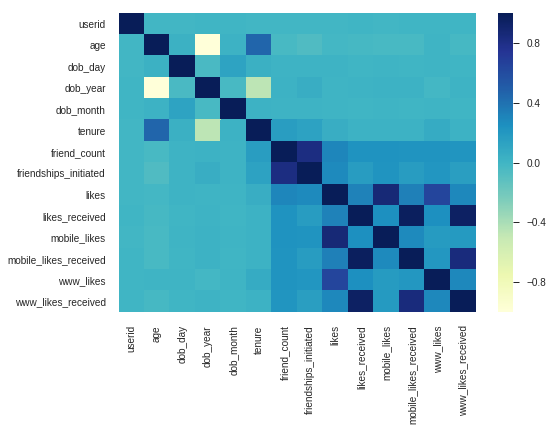

In [0]:
corr=df.corr()

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap="YlGnBu")

Text(0.5, 1.0, 'Likes vs Likes Received')

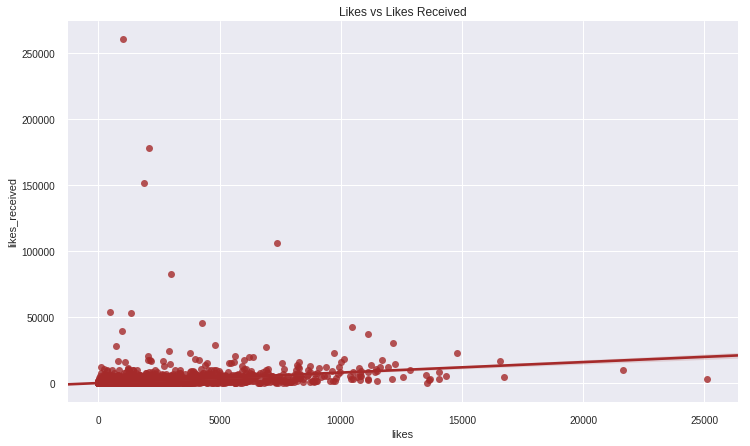

In [0]:
plt.figure(figsize=(12,7))
sns.regplot(data=df, x='likes', y='likes_received', color='brown')

plt.title('Likes vs Likes Received')

#Find Corellation Between Likes & Likes Received: Very Low Corellation



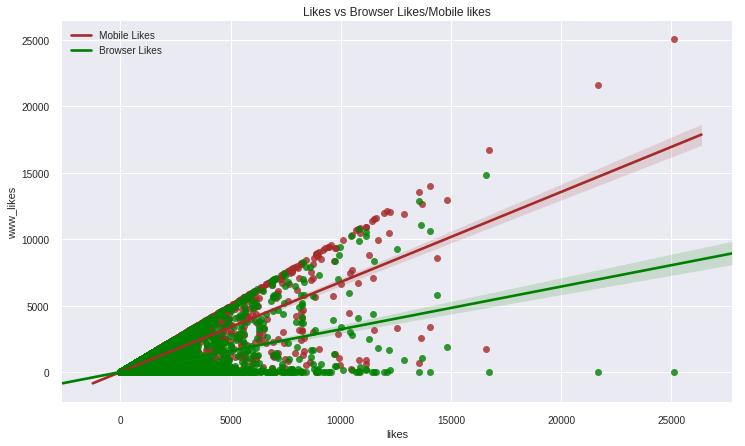

In [0]:
plt.figure(figsize=(12,7))
sns.regplot(data=df, x='likes', y='mobile_likes', color='brown')

plt.title('Likes vs Mobile Likes')
sns.regplot(data=df, x='likes', y='www_likes', color='green')

plt.title('Likes vs Browser Likes/Mobile likes')
plt.legend(labels=('Mobile Likes','Browser Likes'))
#Correllation between Likes vs  Likes by Mobile / Likes by Browser: High Corellation. Mobile Likes are highly correlated to likes as compared to the Browser Likes.

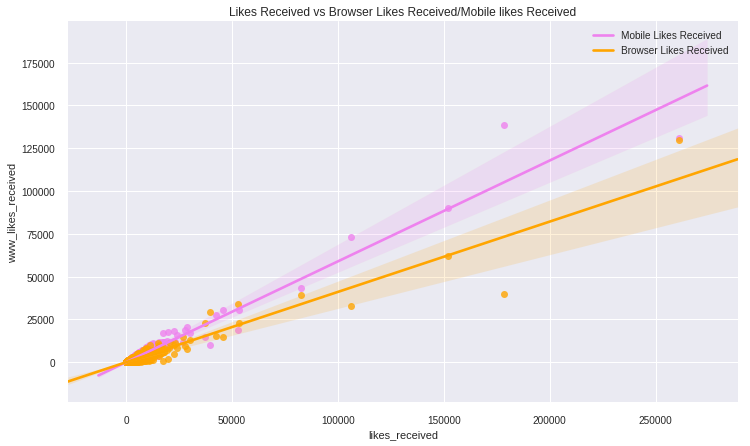

In [0]:
plt.figure(figsize=(12,7))
sns.regplot(data=df, x='likes_received', y='mobile_likes_received', color='violet')

sns.regplot(data=df, x='likes_received', y='www_likes_received', color='orange')

plt.title('Likes Received vs Browser Likes Received/Mobile likes Received')
plt.legend(labels=('Mobile Likes Received','Browser Likes Received'))
#Correllation between Likes Received vs Mobile Likes Received/Browser Likes Received:Very High Corellation. 
#Mobile Likes Received are very highly correlated to likes received as compared to the Browser Likes Reveived which show high correllation with Likes Received..

Text(0.5, 1.0, 'Comparing Age Group vs User Count')

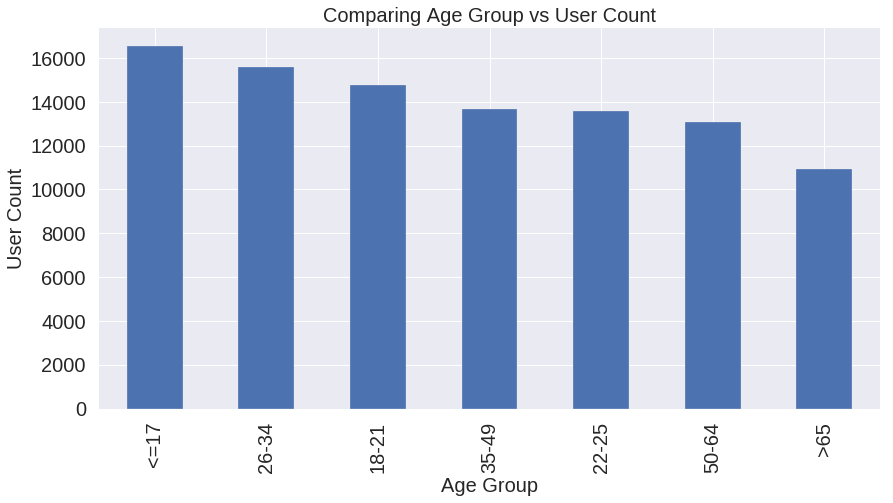

In [0]:
df['age_group']= pd.cut(df['age'].dropna(),[0,18,22,26,35,50,65,113],labels=['<=17','18-21','22-25','26-34','35-49','50-64','>65'],include_lowest=True)
#Distributing the continuous data into (
df['age_group'].value_counts().plot(kind='bar', figsize=(14,7),fontsize=20)
plt.xlabel('Age Group', fontsize=20)
plt.ylabel('User Count', fontsize=20)
plt.title('Comparing Age Group vs User Count', fontsize=20)

#Maximum Users are from age Group 16-24.

In [0]:
(df[df['likes']==0]['likes'].count()/df['likes'].count())*100 #21% of the FaceBook Users have Zero Likes

21.89998065192819

In [0]:
df.count()


userid                   99003
age                      99003
dob_day                  99003
dob_year                 99003
dob_month                99003
gender                   98828
tenure                   99001
friend_count             99003
friendships_initiated    99003
likes                    99003
likes_received           99003
mobile_likes             99003
mobile_likes_received    99003
www_likes                99003
www_likes_received       99003
age_group                99003
dtype: int64

Text(0.5, 1.0, 'Comparing Age Group vs Friend Counts for Users')

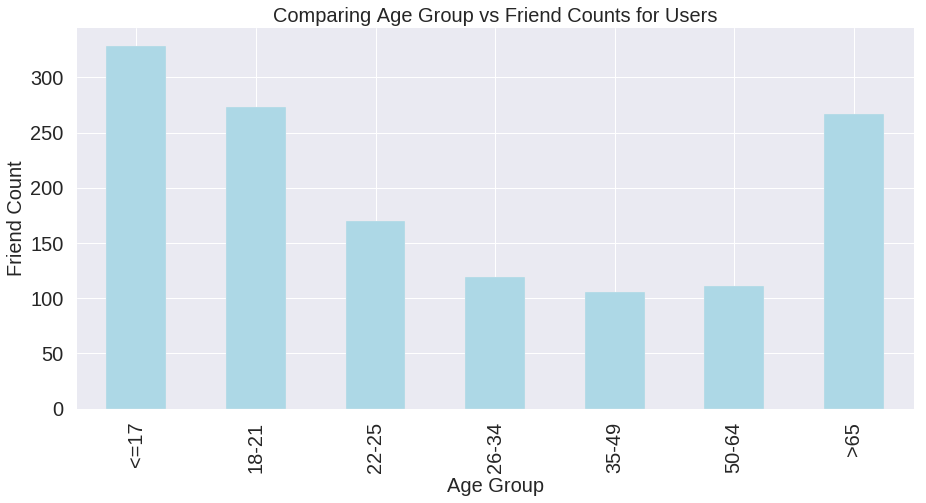

In [0]:
df.groupby(['age_group'])['friend_count'].mean().plot(kind='bar', figsize=(15, 7), color='lightblue', fontsize=20)
plt.xlabel('Age Group', fontsize=20)
plt.ylabel('Friend Count', fontsize=20)
plt.title('Comparing Age Group vs Friend Counts for Users', fontsize=20)

#Plotting a graph for Friend Count wrt Age Group

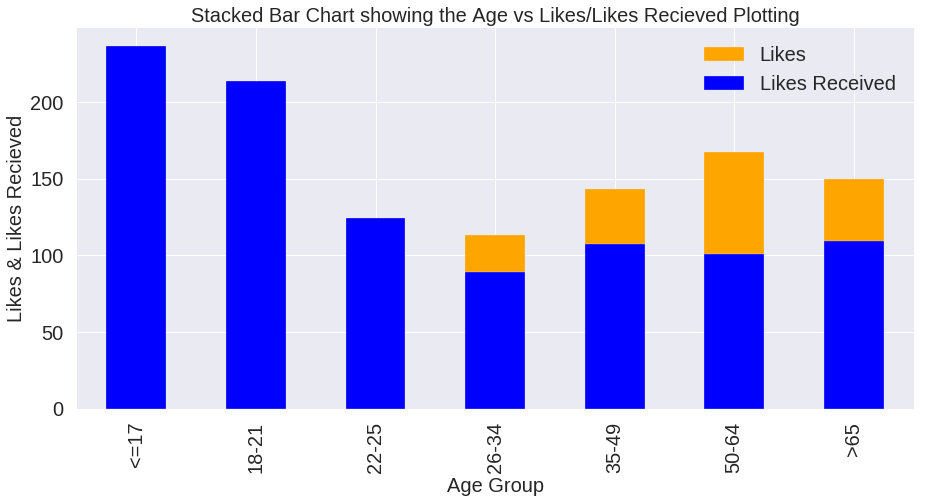

In [0]:

df.groupby(['age_group'])['likes'].mean().plot(kind='bar', figsize=(15, 7), color='orange',fontsize=20)

df.groupby(['age_group'])['likes_received'].mean().plot(kind='bar', figsize=(15, 7), color='blue',fontsize=20)
plt.xlabel('Age Group',fontsize=20)
plt.ylabel('Likes & Likes Recieved',fontsize=20)
plt.title('Stacked Bar Chart showing the Age vs Likes/Likes Recieved Plotting',fontsize=20)
plt.legend(labels=('Likes','Likes Received'),fontsize=20)

#Plotting Likes & Likes Received with reference to age group
#Treand shows the users from Age Group till 25 receives more like where as users from age group 26 onwards hit more likes than received.


Text(0.5, 1.0, 'Age Group vs Likes Recieved')

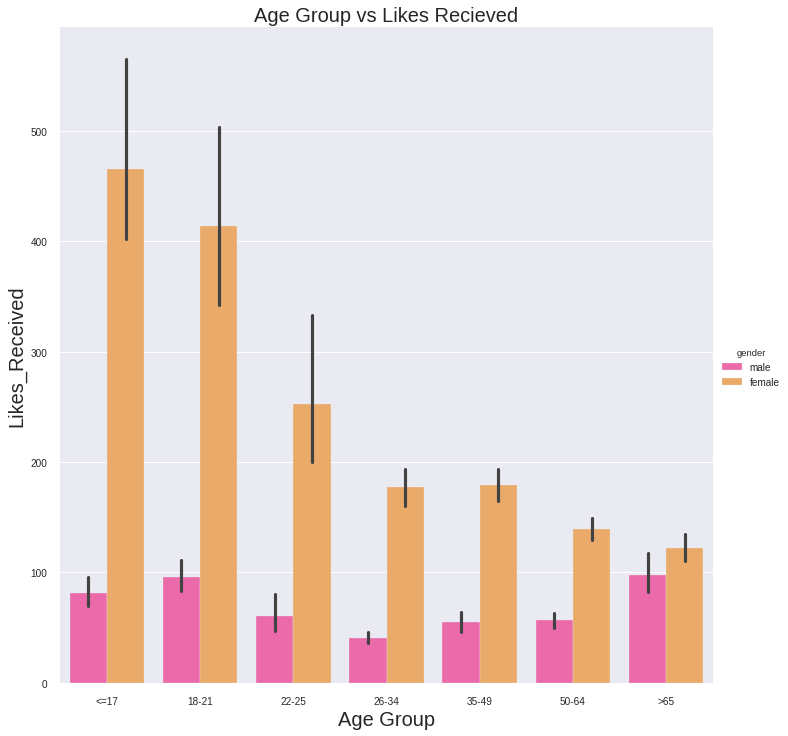

In [0]:
sns.catplot(x='age_group', y='likes_received', hue='gender', data=df,  height=10, kind='bar', 
            palette='spring' )
# Females in all the age groups gets more like however in the agr from 13-16, 16-24, they have the most likes received.
plt.xlabel('Age Group',fontsize=20)
plt.ylabel('Likes_Received',fontsize=20)
plt.title('Age Group vs Likes Recieved',fontsize=20)


Text(0.5, 1.0, 'Age Group vs Likes')

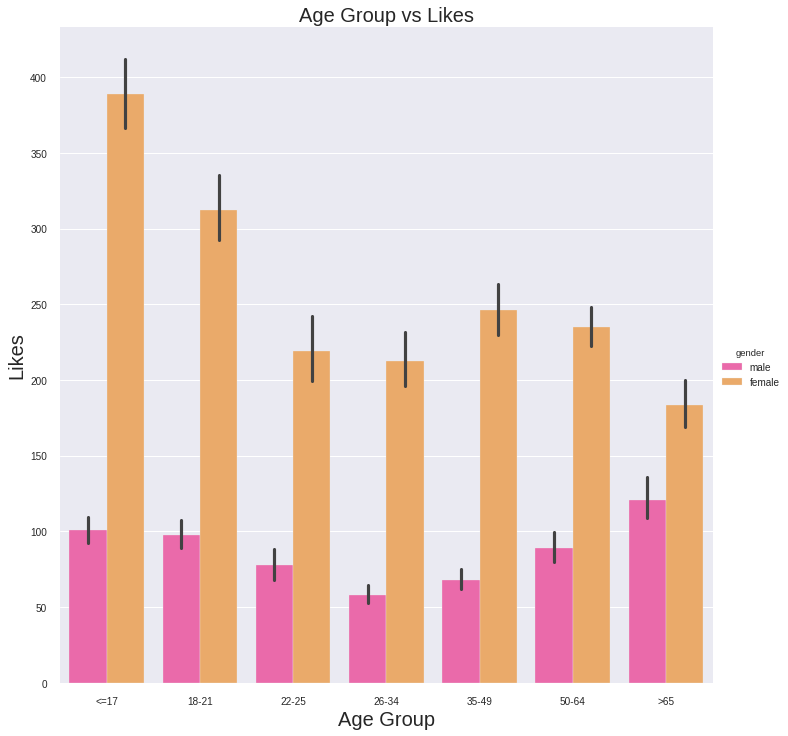

In [0]:
sns.catplot(x='age_group', y='likes', hue='gender', data=df,  height=10, kind='bar', 
            palette='spring')
plt.xlabel('Age Group',fontsize=20)
plt.ylabel('Likes',fontsize=20)
plt.title('Age Group vs Likes',fontsize=20)
# Below plot shows that females are expressive on facebook. Wehere as males are less expressive. One angle could be that females spend more time on facebook.

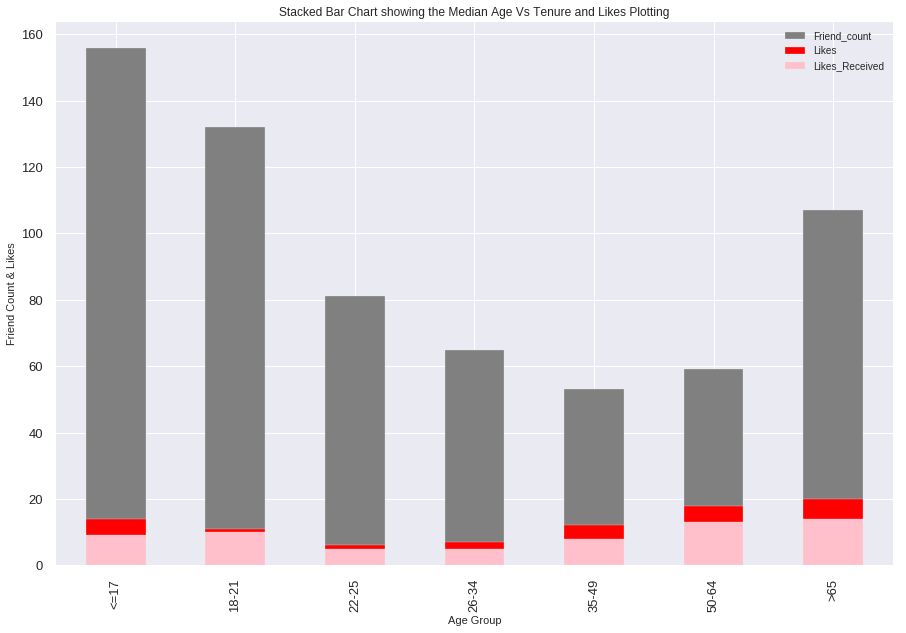

In [0]:

df.groupby(['age_group'])['friend_count'].median().plot(kind='bar', figsize=(15, 10), color='grey')
df.groupby(['age_group'])['likes'].median().plot(kind='bar', figsize=(15, 10), color='red', fontsize=13)
df.groupby(['age_group'])['likes_received'].median().plot(kind='bar', figsize=(15, 10), color='pink', fontsize=13)
plt.xlabel('Age Group')
plt.ylabel('Friend Count & Likes')
plt.title('Stacked Bar Chart showing the Median Age Vs Tenure and Likes Plotting')
plt.legend(labels=( 'Friend_count', 'Likes','Likes_Received'))

#More the freind count more the likes hit by a user. However likes received depends on other factors apart from friend count as well.

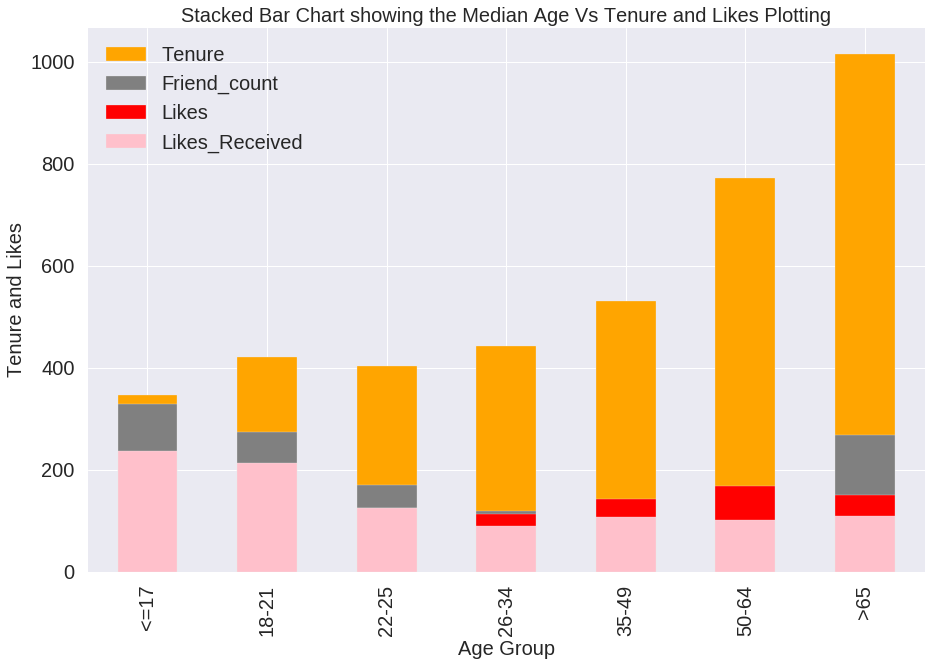

In [0]:
df.groupby(['age_group'])['tenure'].mean().plot(kind='bar', figsize=(15, 10), color='orange',fontsize=20)
df.groupby(['age_group'])['friend_count'].mean().plot(kind='bar', figsize=(15, 10), color='grey',fontsize=20)
df.groupby(['age_group'])['likes'].mean().plot(kind='bar', figsize=(15, 10), color='red', fontsize=20)
df.groupby(['age_group'])['likes_received'].mean().plot(kind='bar', figsize=(15, 10), color='pink', fontsize=20)
plt.xlabel('Age Group',fontsize=20)
plt.ylabel('Tenure and Likes',fontsize=20)
plt.title('Stacked Bar Chart showing the Median Age Vs Tenure and Likes Plotting',fontsize=20)
plt.legend(labels=('Tenure', 'Friend_count', 'Likes','Likes_Received'),fontsize=20)
#Plot to find a relation between Tenure, Freind Count, Likes and Likes Received.
#Older age group users have more tenure at FB.
#More the Friend Count the users have, more the likes hits by the users.
#Young age Group users get more likes.
#Old Age Group users hits morelikes.

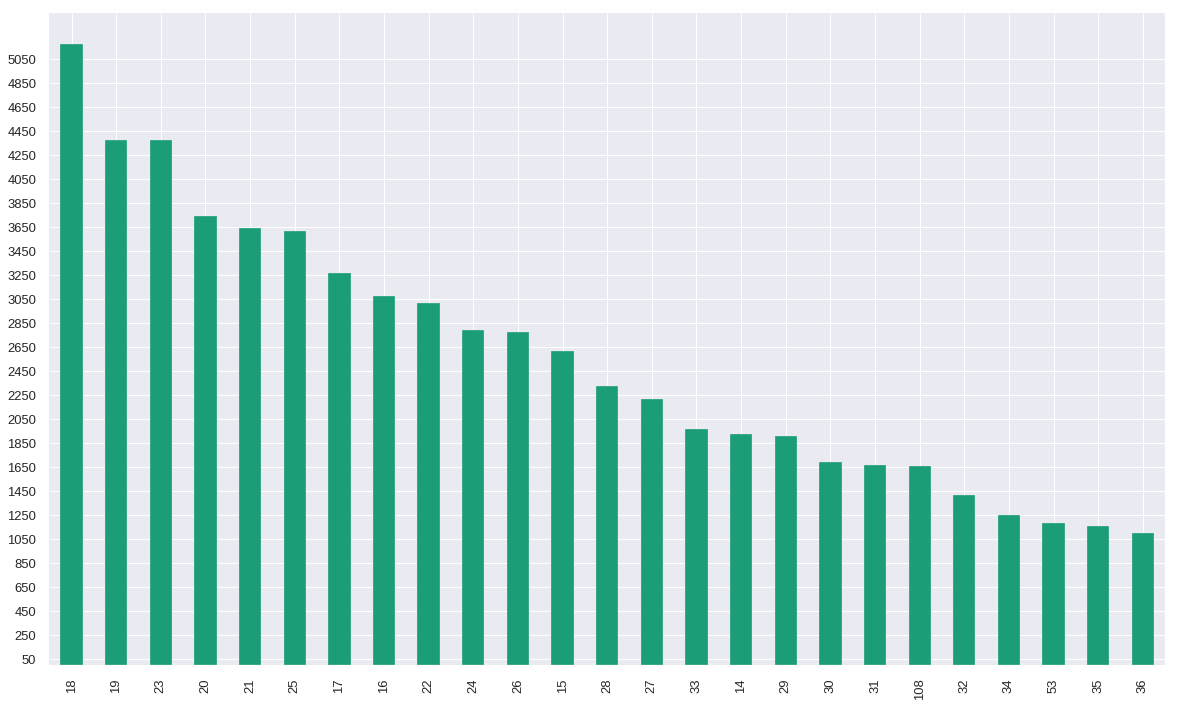

In [0]:
#df['dob_year'].value_counts().sort_values(ascending=True)
df['age'].value_counts()[:25].plot.bar(figsize=(20,12), colormap='Dark2', fontsize=13, yticks=np.arange(50, 5250,200)) #Finding the facebook users of maximum age group
#Top 25 age group of the FB users lies Between the age group of 14 to 35.

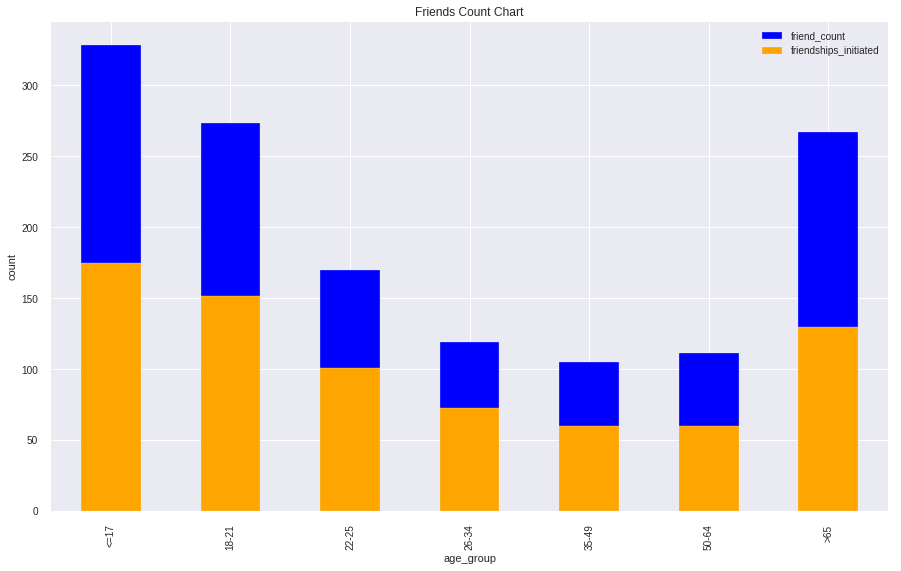

In [0]:

 #Frinedship initiated and requet recieved are equally distributed

df.groupby(['age_group'])['friend_count'].mean().plot(kind='bar', figsize=(30, 14), color='blue')
df.groupby(['age_group'])['friendships_initiated'].mean().plot(kind='bar', figsize=(15, 9), color='orange')


plt.xlabel('age_group')
plt.ylabel('count')
plt.title('Friends Count Chart')
plt.legend(labels=('friend_count','friendships_initiated'))


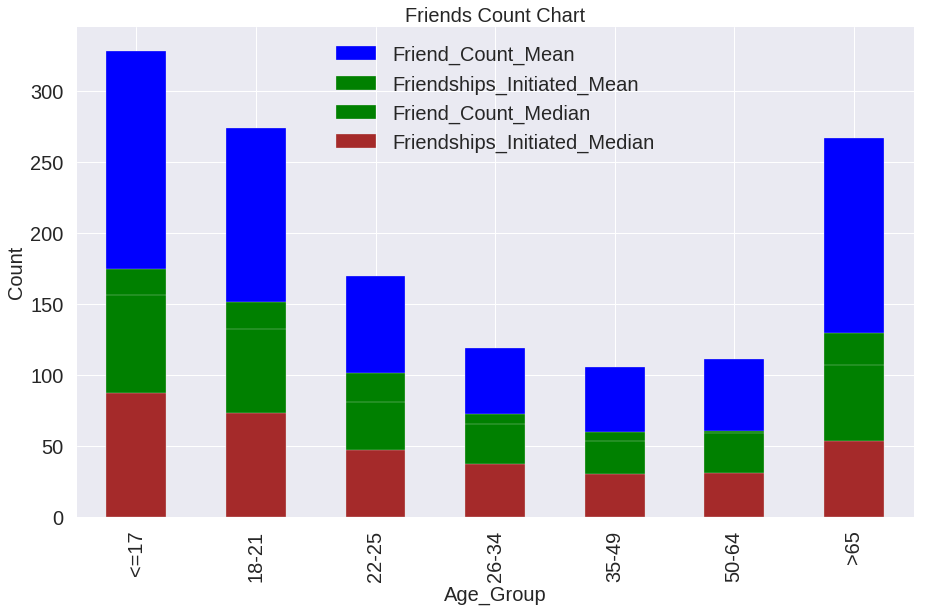

In [0]:

 #Frinedship initiated and requet recieved are equally distributed

df.groupby(['age_group'])['friend_count'].mean().plot(kind='bar', figsize=(30, 14), color='blue',fontsize=20)
df.groupby(['age_group'])['friendships_initiated'].mean().plot(kind='bar', figsize=(15, 9), color='green',fontsize=20)

df.groupby(['age_group'])['friend_count'].median().plot(kind='bar', figsize=(30, 14), color='green',fontsize=20)
df.groupby(['age_group'])['friendships_initiated'].median().plot(kind='bar', figsize=(15, 9), color='brown',fontsize=20)


plt.xlabel('Age_Group',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title('Friends Count Chart',fontsize=20)
plt.legend(labels=('Friend_Count_Mean','Friendships_Initiated_Mean','Friend_Count_Median','Friendships_Initiated_Median'),fontsize=20)

#more than 200 pwecent of difference between mean and median for freind_count and friendships_initiates shows high skewness in the data.

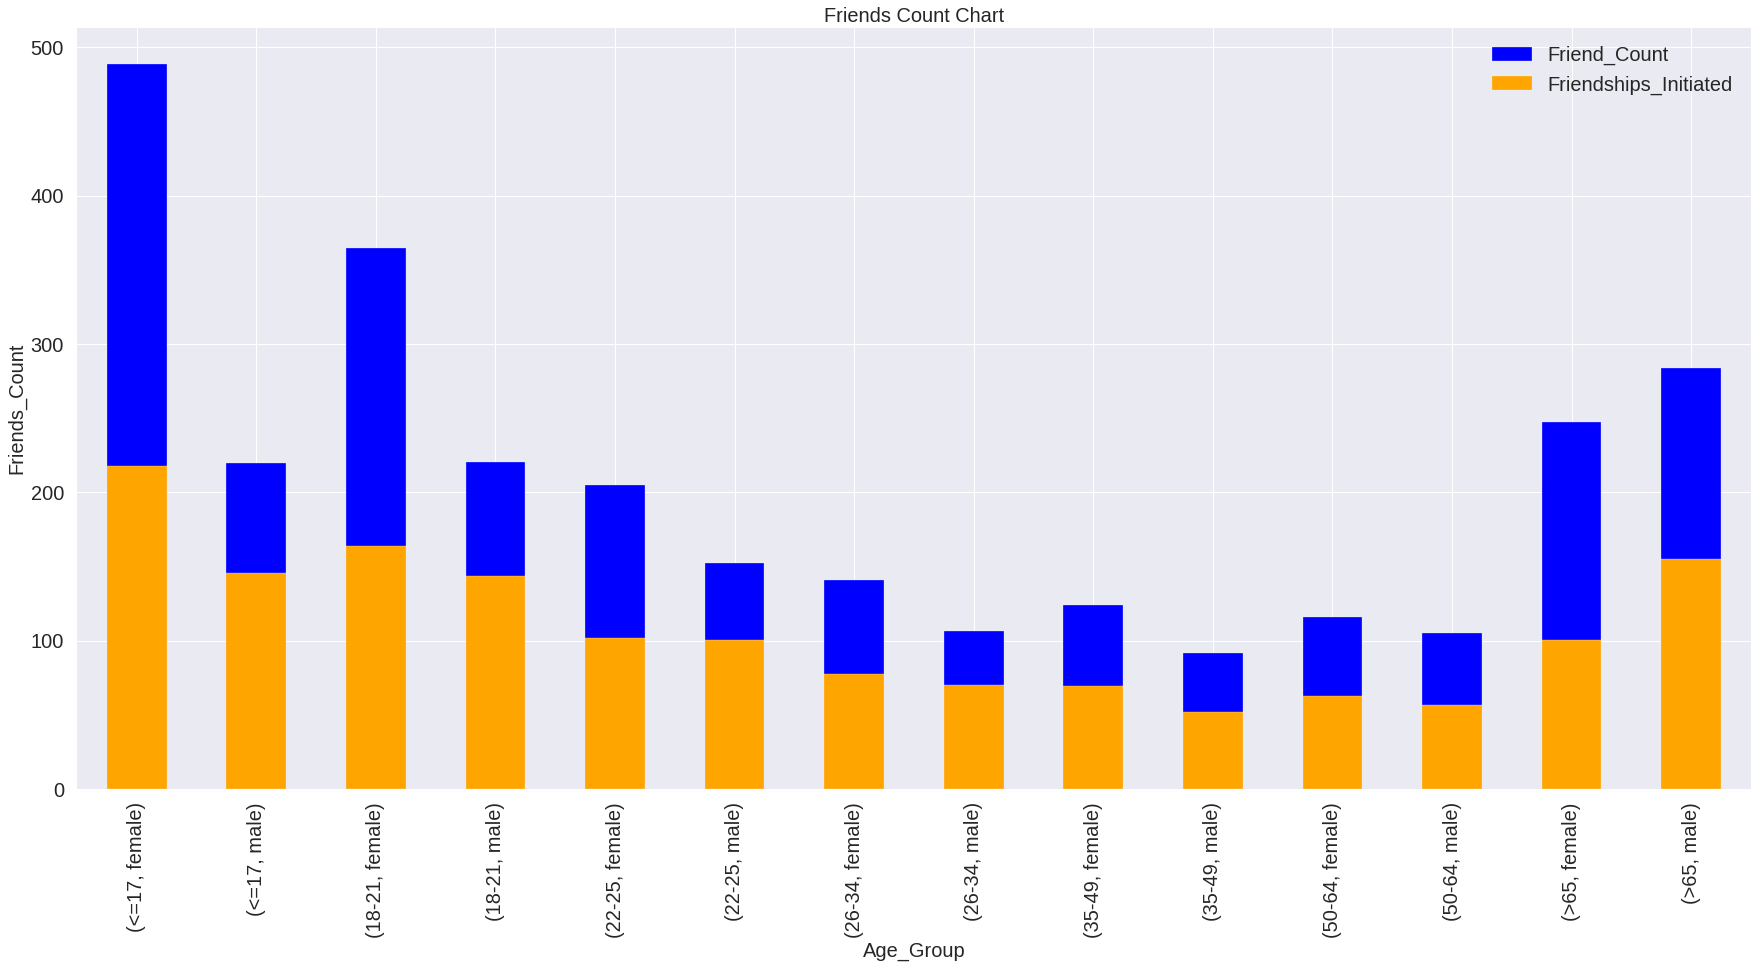

In [0]:
 #Frinedship initiated and requet recieved are equally distributed
 #Females have high freind count and freindships initiated/ requests received compared to males.
 #Older age group users have more freind counts/ freindship Initiated/ friendship received for males than femaless.

df.groupby(['age_group','gender'])['friend_count'].mean().plot(kind='bar', figsize=(30, 14), color='blue', fontsize=20)
df.groupby(['age_group','gender'])['friendships_initiated'].mean().plot(kind='bar', figsize=(30, 14), color='orange',fontsize=20)

plt.xlabel('Age_Group',fontsize=20)
plt.ylabel('Friends_Count',fontsize=20)
plt.title('Friends Count Chart',fontsize=20)
plt.legend(labels=('Friend_Count','Friendships_Initiated'),fontsize=20)   


In [0]:
df.head(5)

index   userid  age  dob_day  dob_year  dob_month  gender  tenure  \
0  0      2094382  14   19       1999      11         male    266.0    
1  1      1192601  14   2        1999      11         female  6.0      
2  2      2083884  14   16       1999      11         male    13.0     
3  3      1203168  14   25       1999      12         female  93.0     
4  4      1733186  14   4        1999      12         male    82.0     

   friend_count  friendships_initiated  likes  likes_received  mobile_likes  \
0  0             0                      0      0               0              
1  0             0                      0      0               0              
2  0             0                      0      0               0              
3  0             0                      0      0               0              
4  0             0                      0      0               0              

   mobile_likes_received  www_likes  www_likes_received age_group  
0  0                      0          0                   <=17      
1  0                      0          0                   <=17      
2  0                      0          0                   <=17      
3  0                      0          0                   <=17      
4  0                      0          0                   <=17

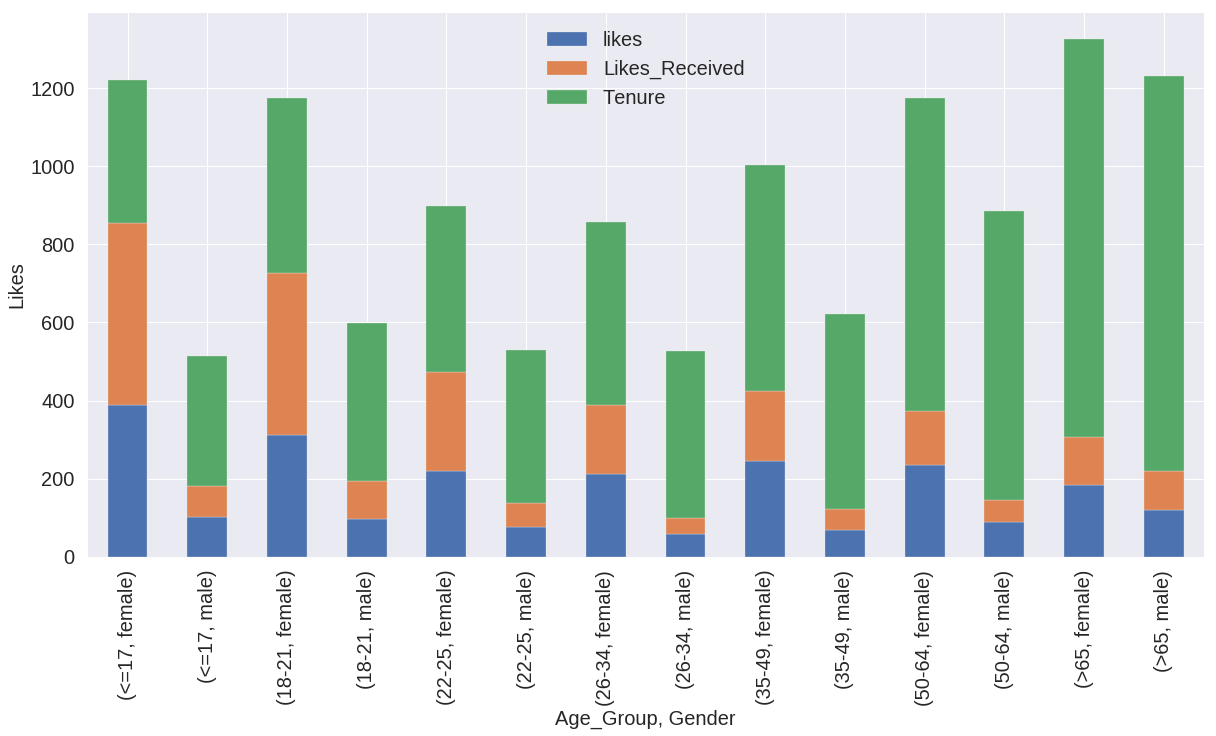

In [0]:
df.groupby(['age_group','gender'])[['likes','likes_received','tenure']].mean().plot(kind='bar', figsize= (20,10) ,stacked=True,fontsize=20)
plt.xlabel('Age_Group, Gender', fontsize=20)
plt.ylabel('Likes',fontsize=20)
plt.legend(labels=('likes','Likes_Received', 'Tenure'), fontsize=20)
#Female across age-groups have more tenure compared to the males from that age group. The ratio of tenure between males and females across age-groups is as high as 200% till the age group of 21. 
#Hence till the age group of 21,forever 2 females joining facebook a male joins facebook.
# For each age group the likes recieved and the likes are more for females compared to the males.
#The ratio between male & female likes/likes received is almost 180 % in the younger age groups however it gradually decreases to 105%.


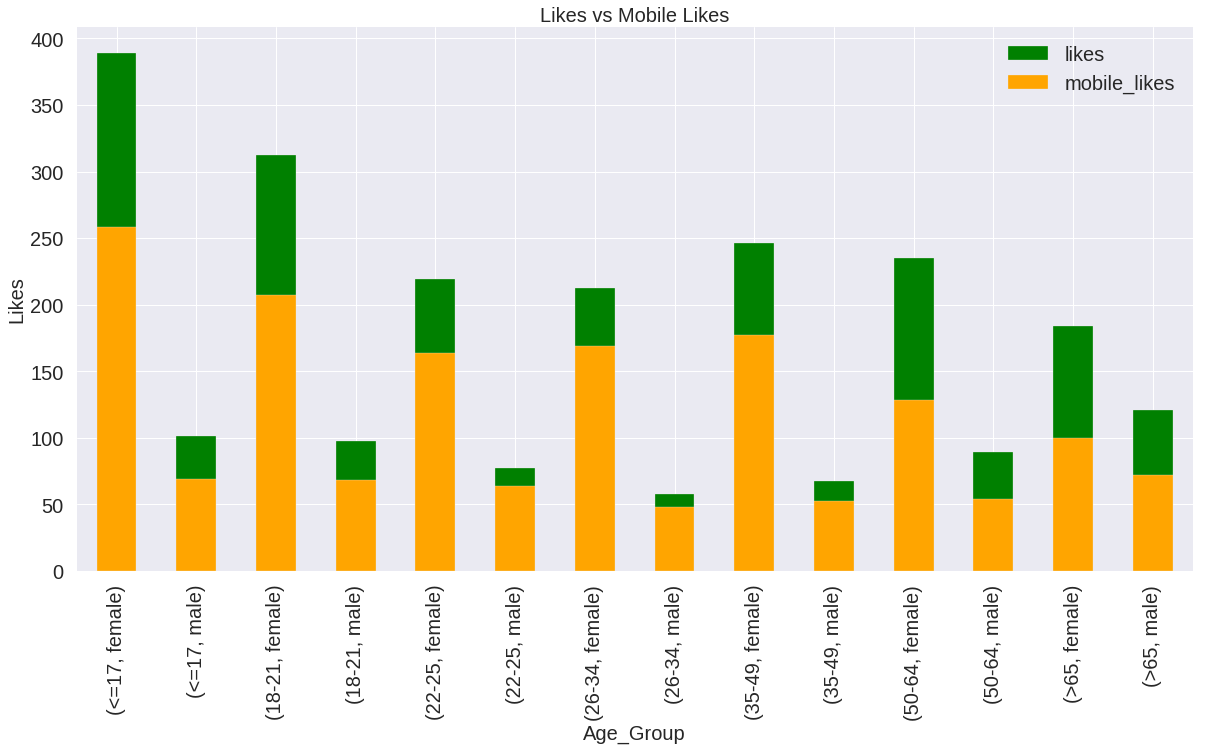

In [0]:
 #Plotting of Likes and Mobile Likes w.r.t. Age_Goup and Gender.
 #Females users from the age range 17-21 have the highest likes
 #Females across age group are more active on FB.
 #All the users show a tendency to use FB over mobile.
 #The users in the age range 22-49 have the least likes and majority of then is from Mobiles. Hence it shows they use the application very less. And they tend to use it when they have free time. This category of users are either working professionals or involved in higher studies.
#Users with the age range > 50 use both the Mobile as well as Web Brwser.
#This indicates that they are reteired or have morefree time as compared to the young age group users.


df.groupby(['age_group','gender'])['likes'].mean().plot(kind='bar', figsize=(20, 10), color='green',fontsize=20)

df.groupby(['age_group','gender'])['mobile_likes'].mean().plot(kind='bar', figsize=(20,10), color='orange',fontsize=20)

plt.xlabel('Age_Group', fontsize=20)
plt.ylabel('Likes',fontsize=20)
plt.title('Likes vs Mobile Likes',fontsize=20)
plt.legend(labels=('likes','mobile_likes'),fontsize=20)



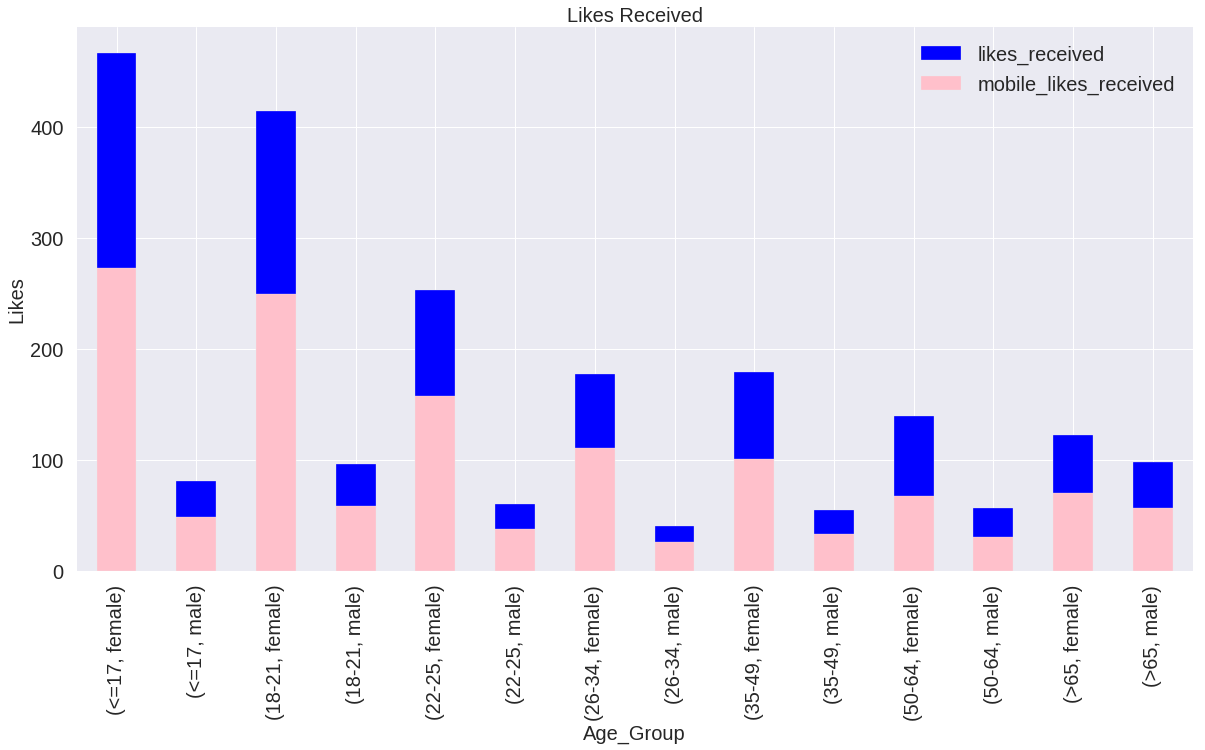

In [0]:
#Femlae Users gets more likes than male users in across every age group. Mobile like received holds the edge across all the age groups.
 #Female users in the age range 17-21 gets the most likes. Mobile and Browser likes are equally distributed. This means they get likes from around all the age groups users.
#Users from agegroup 21-49 have very low likes received: It indicated they are less active on FB and posts very less.
#User from age group 50-64 have low likes received. This indicates they do not pull as much attention as compared to the other high likes receiving age groups.

df.groupby(['age_group','gender'])['likes_received'].mean().plot(kind='bar', figsize=(20, 10), color='blue',fontsize=20)

df.groupby(['age_group','gender'])['mobile_likes_received'].mean().plot(kind='bar', figsize=(20, 10), color='pink',fontsize=20)

plt.xlabel('Age_Group',fontdict=None,labelpad=None, fontsize=20)
plt.ylabel('Likes',fontsize=20)
plt.title('Likes Received',fontsize=20)
plt.legend(labels=('likes_received','mobile_likes_received'),fontsize=20)
